<a href="https://colab.research.google.com/github/PrncssAnnMrgrtUy/ITBA3204_FightTheBite/blob/main/Dengue_Cases_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [132]:
url='https://raw.githubusercontent.com/PrncssAnnMrgrtUy/ITBA3204_FightTheBite/main/ds/ph_dengue_cases2016-2020.csv'
df = pd.read_csv(url)
df.head().style.background_gradient(cmap='YlOrRd_r')

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1


In [133]:
df.tail().style.background_gradient(cmap='YlOrRd_r')

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1
1019,December,2020,BARMM,23,0


In [134]:
df.shape

(1020, 5)

In [135]:
df.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [137]:
df.describe().style.background_gradient(cmap='YlOrRd_r')

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [138]:
np.unique(df['Region'])

array(['BARMM', 'CAR', 'NCR', 'Region I', 'Region II', 'Region III',
       'Region IV-A', 'Region IV-B', 'Region IX', 'Region V', 'Region VI',
       'Region VII', 'Region VIII', 'Region X', 'Region XI', 'Region XII',
       'Region XIII'], dtype=object)

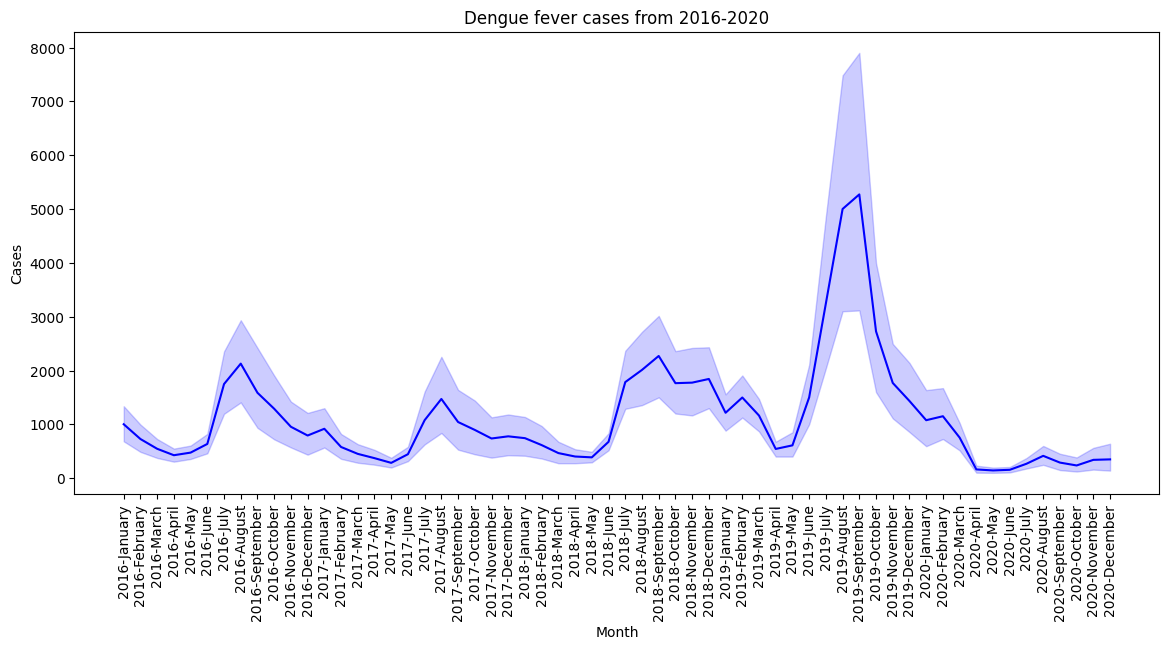

In [139]:
index = 0
monthYears = []
years = [i for i in df.Year]
for i in df.Month:
    monthYears.append(str(years[index])+'-'+str(i))
    index += 1
plt.figure(figsize=(14,6))
sns.lineplot(x=monthYears,y=[i for i in df['Dengue_Cases']],color='blue')
plt.title(label='Dengue fever cases from 2016-2020')
plt.xlabel(xlabel='Month')
plt.ylabel(ylabel='Cases')
plt.xticks(rotation=90)
plt.show()

In [131]:
index = 0
dates = []
for i in df['Month']:
    dates.append(str([j for j in df['Year']][index])+'-'+i)
    index += 1
    
data = {'Date': dates,
        'Region': [i for i in df['Region']],
        'Dengue_Cases': [i for i in df['Dengue_Cases']],
        'Dengue_Deaths': [i for i in df['Dengue_Deaths']]}
cleanDF = pd.DataFrame(data)
cleanDF.head().style.background_gradient(cmap='YlOrRd_r')

,Date,Region,Dengue_Cases,Dengue_Deaths
0,2016-January,Region I,705,1
1,2016-February,Region I,374,0
2,2016-March,Region I,276,0
3,2016-April,Region I,240,2
4,2016-May,Region I,243,1


<ipython-input-130-ce4c42e47681>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(casesDF.pivot("Month", "Year", "Cases"), cmap='YlOrRd_r')


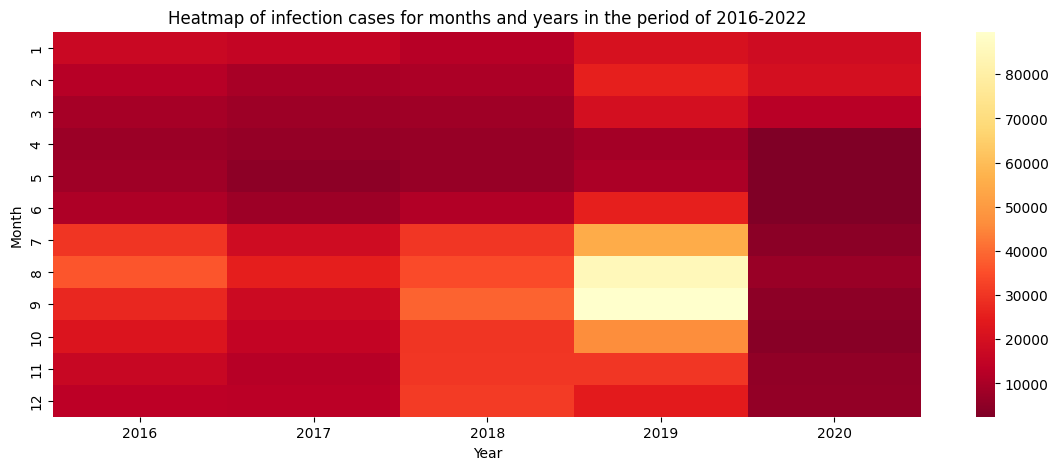

In [130]:
uniqueDates = []
for i in [j for j in cleanDF['Date']]:
    if i not in uniqueDates:
        uniqueDates.append(i)
totalCases = []
for i in uniqueDates:
    tempDF = cleanDF.query("Date == '{}'".format(i))
    totalCases.append([datetime.datetime.strptime(i.split('-')[1], '%B').month,
                       int(i.split('-')[0]),sum([i for i in tempDF['Dengue_Cases']])])
casesDF = pd.DataFrame(totalCases,columns=['Month','Year','Cases'])
plt.figure(figsize=(14,5))
sns.heatmap(casesDF.pivot("Month", "Year", "Cases"), cmap='YlOrRd_r')
plt.title(label='Heatmap of infection cases for months and years in the period of 2016-2022')
plt.show()

In [102]:
regionCases = []
for i in np.unique(cleanDF['Region']):
    tempDF = cleanDF.query("Region == '{}'".format(i))
    regionCases.append([sum([i for i in tempDF['Dengue_Cases']]),i])
regionCases.sort()

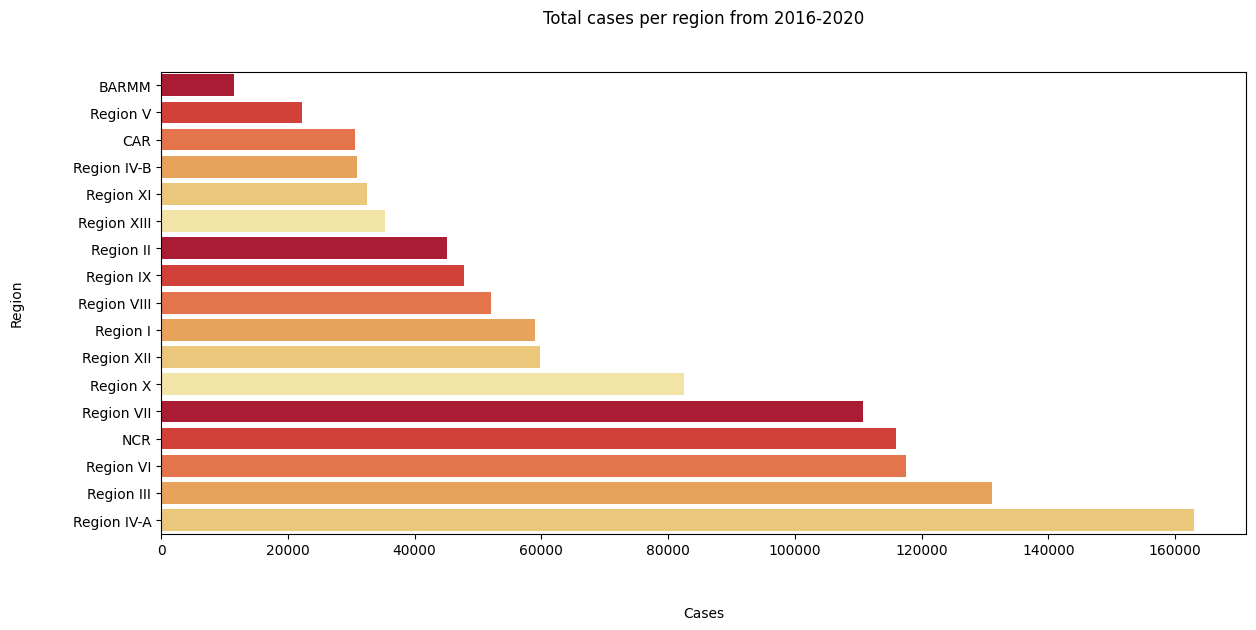

In [129]:
x = [i[0] for i in regionCases]
y = [i[1] for i in regionCases]

colors = sns.color_palette("YlOrRd_r")
plt.figure(figsize=(14,6))
sns.barplot(x=x,y=y,palette=colors)
plt.title(label='Total cases per region from 2016-2020',pad=35)
plt.xlabel(xlabel='Cases',labelpad=35)
plt.ylabel(ylabel='Region',labelpad=35)
plt.show()

In [140]:
cleanDF.head().style.background_gradient(cmap='YlOrRd_r')

,Date,Region,Dengue_Cases,Dengue_Deaths
0,2016-January,Region I,705,1
1,2016-February,Region I,374,0
2,2016-March,Region I,276,0
3,2016-April,Region I,240,2
4,2016-May,Region I,243,1


In [141]:
data = []
index = 0
for i in cleanDF['Date']:
    data.append([i,'Cases',[j for j in cleanDF['Dengue_Cases']][index]])
    data.append([i,'Deaths',[k for k in cleanDF['Dengue_Deaths']][index]])
    index += 1
columns = ['Date','Attribute','Total']
alteredDF = pd.DataFrame(data,columns = columns)
alteredDF.head().style.background_gradient(cmap='YlOrRd_r')

,Date,Attribute,Total
0,2016-January,Cases,705
1,2016-January,Deaths,1
2,2016-February,Cases,374
3,2016-February,Deaths,0
4,2016-March,Cases,276


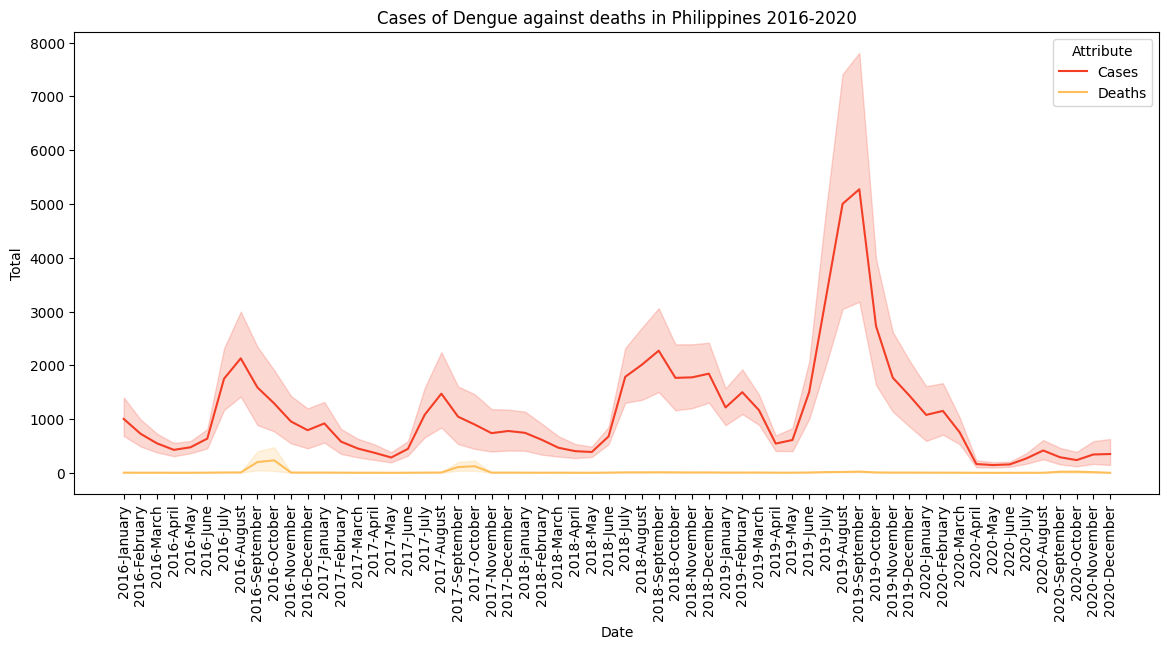

In [142]:
plt.figure(figsize=(14,6))
sns.lineplot(x='Date',y='Total',data=alteredDF,hue='Attribute',palette='YlOrRd_r')
plt.title(label='Cases of Dengue against deaths in Philippines 2016-2020')
plt.xticks(rotation=90)
plt.show()

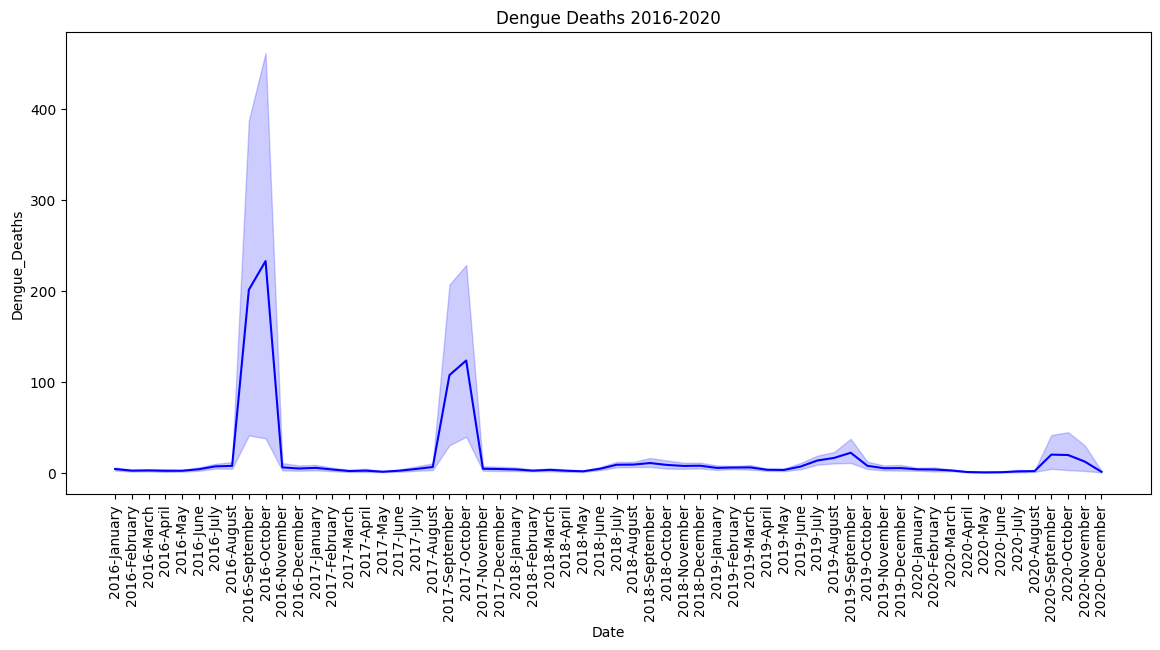

In [143]:
plt.figure(figsize=(14,6))
sns.lineplot(x=cleanDF.Date,y=cleanDF.Dengue_Deaths,color='blue')
plt.title(label='Dengue Deaths 2016-2020')
plt.xticks(rotation=90)
plt.show()

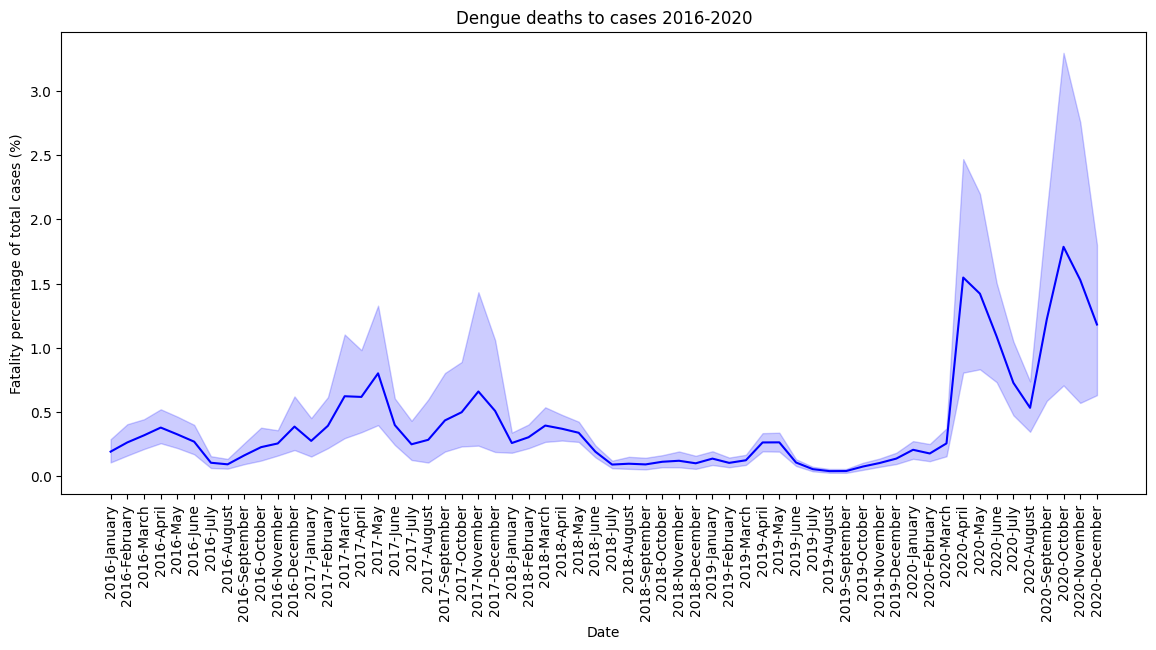

In [144]:
cases = [i for i in cleanDF.Dengue_Cases]
deaths = [i for i in cleanDF.Dengue_Deaths]
ratios = []
index = 0
for i in cases:
    ratios.append(deaths[index]/i *100)
plt.figure(figsize=(14,6))
sns.lineplot(x=cleanDF.Date,y=ratios,color='blue')
plt.title(label='Dengue deaths to cases 2016-2020')
plt.ylabel(ylabel='Fatality percentage of total cases (%)')
plt.xticks(rotation=90)
plt.show()

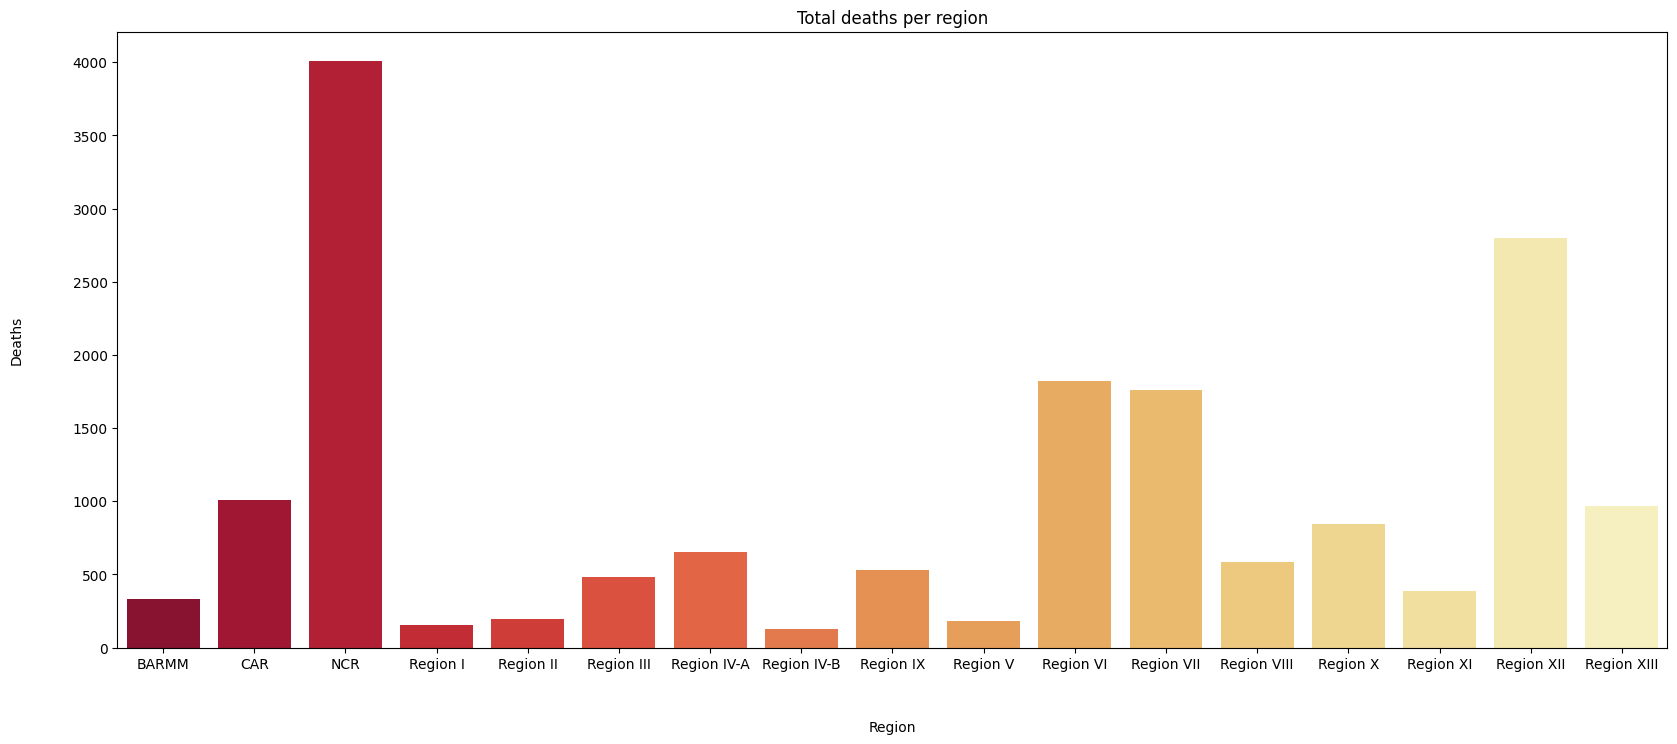

In [145]:
totals = []
for i in np.unique(cleanDF['Region']):
    tempDF = cleanDF.query("Region == '{}'".format(i))
    totals.append([i,sum([i for i in tempDF['Dengue_Deaths']])])
    
plt.figure(figsize=(20,8))
sns.barplot(x=[i[0] for i in totals],y=[i[1] for i in totals],palette='YlOrRd_r')
plt.ylabel(ylabel='Deaths',labelpad=35)
plt.xlabel(xlabel='Region',labelpad=35)
plt.title(label='Total deaths per region')
plt.show()

In [146]:
cleanDF.corr().style.background_gradient(cmap='YlOrRd_r')

<ipython-input-146-d34442080e94>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cleanDF.corr().style.background_gradient(cmap='YlOrRd_r')


,Dengue_Cases,Dengue_Deaths
Dengue_Cases,1.000000,0.038322
Dengue_Deaths,0.038322,1.000000


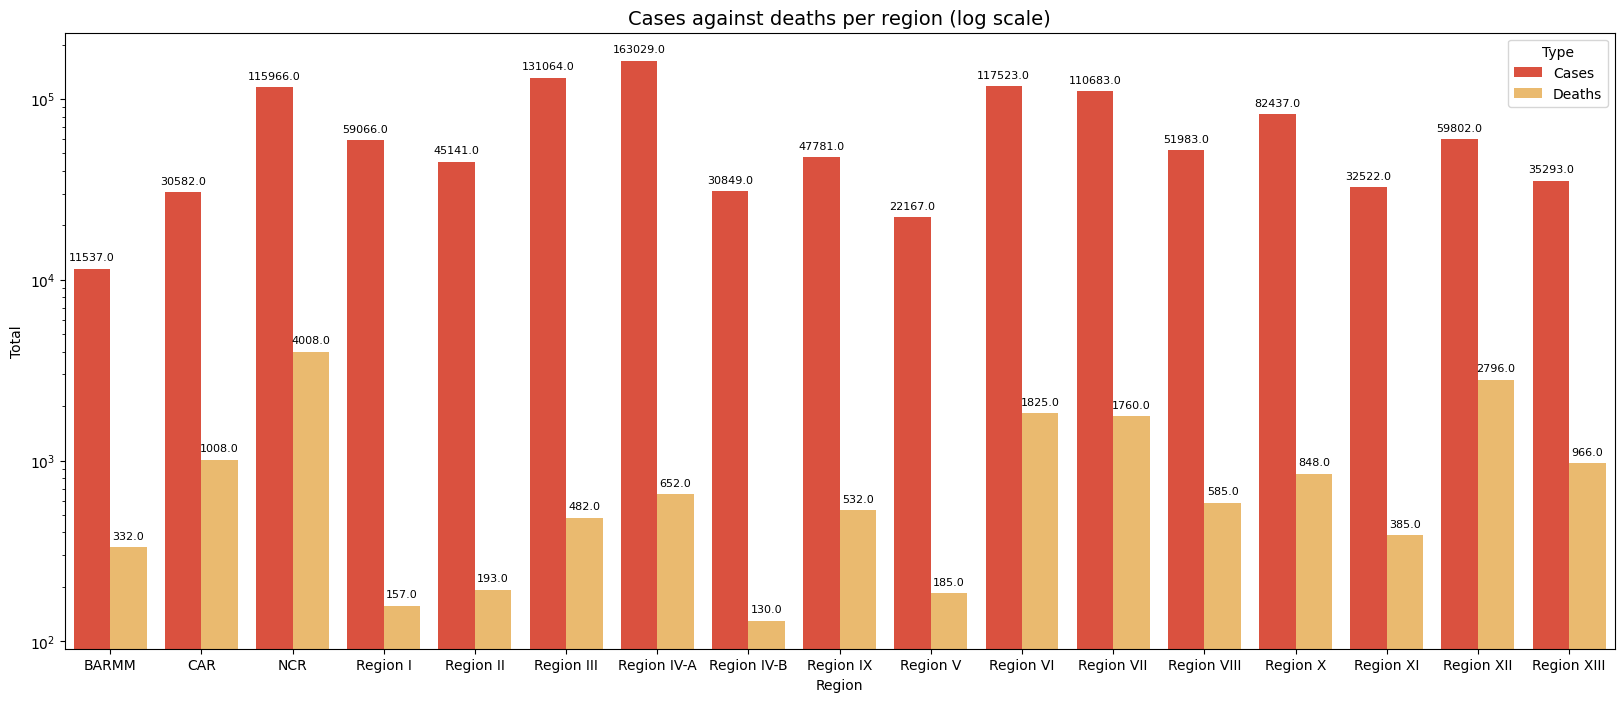

In [147]:
totals = []
for i in np.unique(cleanDF['Region']):
    tempDF = cleanDF.query("Region == '{}'".format(i))
    totals.append([i,'Cases',sum([i for i in tempDF['Dengue_Cases']])])
    totals.append([i,'Deaths',sum([i for i in tempDF['Dengue_Deaths']])])
totalsDF = pd.DataFrame(totals,columns=['Region','Type','Total'])

plt.figure(figsize=(20,8))
g = sns.barplot(x='Region', y='Total', hue='Type', data=totalsDF,palette='YlOrRd_r')
plt.title(label='Cases against deaths per region (log scale)',fontsize=14)
g.set_yscale("log")
#g.set_yticklabels([0,10,100,1000,10000,100000])
for bar in g.patches:
  g.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.show()